<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

Differential equations allow us to model systems that change. They also help us capture some of these systems' essential dynamical features. However, these changes need no necessarily be time. They could be:

1. change in elevation as you walk along mountainous terrain,
2. change in the nutrients in the soil as you walk along a field,
3. change in nutrients as we dive into the ocean,
4. change in the concentration of a medicine in our blood as the day progresses,
5. change in the brightness of sunlight as the day progresses,
6. change in the population as time passes.
7. changes in how fast a chemical reaction occurs as the reagents’ concentration is depleted.

First three relate to **change in space** while latter three to **changes in time**.
The last is a **change in concentration**. So a system can change in almost any parameter available

### 1.3 Calculus: Meaning and Notation

To get the most out of differential equations, must know **calculus**. This is because calculus allows us to describe changes mathematically. I will use a concrete example of a changing population to see how this works.

What is a simple model for the change of a population? We can start by assuming that the change in a population will depend on the current size of the population. The justification for this is that fewer people now will mean fewer people later, or more people now will mean even more people later. We can express this idea succinctly as:

$\frac{dN(t)}{dt} = rN(t)$  (1)

$N(t)$ is the number of people at time $t$ where $t$ is time measured in a convenient unit, say years.
$\frac{dN(t)}{dt}$ tells us how much $N(t)$ is changing. $r$ is a constant representing the **rate of growth**. $r$ is useful to distinguish between different types of populations. To make it easeir to read, we will write $N$ instead of $N(t)$, keeping in mind that timne $t$ lurks in the background.

The **symbol** $\frac{dN}{dt}$ on the LHS is read as **rate of change of $N$ with respect to $t$**. The rate tells us how much $N$ will chnage **if** we increase $t$ by a unit.



### 1.4 Calculus: Getting a feel for  $\frac{dN}{dt}$

Can approximate the symbol as a fraction

$\frac{dN}{dt} ≈ \frac{ΔN}{Δt} => ΔN = rNΔt$ (2)

Note the approximate sign (≈). Approximation gets better the smaller we make Δt. We can use this approximation to build up how $N$ will change as follows:

| **Time** | **Population** | **Change for next step** |
|:--------:|:--------------:|:------------------------:|
|   t = 0  |       N0       |       ΔN = rN0 x Δt      |
|  t = Δt  |  N1 = N0 + ΔN  |       ΔN = rN1 x Δt      |
|  t = 2Δt |  N2 = N1 + ΔN  |       ΔN = rN2 x Δt      |
|  t = 3Δt |  N3 = N2 + ΔN  |       ΔN = rN3 x Δt      |
|    ...   |       ...      |            ...           |

N0 is the starting population at t=0


**Stopping a population explosion**
The model says the population will keep growing faster and faster. But this is unrealistic as other factors such as resources come into play. So an improved model for a population is 

$\frac{dN}{dt} = rN(1 - \frac{N}{K})$ (3)

Here $K$ (called the carrying capacity) represents the maximum population that the system can hold sustainably. The equation (elegantly) leads to a reduction in population when the population exceeds the carrying capacity(i.e. $N>K$). When $N>K$ the R.H.S. becomes negative, and the population starts to decrease!

### 1.5 Solving Differential Equations

Equations like (1) and (3) are called **differential equations** because they feature one or more differential terms (such as $\frac{dN}{dt}$). What we mean by **solving** a differential equation is to find a mathematical function that satisfies it32.

A solution to a differential equation can either be **analytical** (i.e. like $y(t) = 3t^3 + 5t$) or **numerical** (i.e. a list of $(t, y)$ numbers). The **Euler method** is one of the simplest and most intuitive ways to solve a differential equation numerically.

### 1.6 The Euler Method

Euler Method is based on equation (2). This is the recipe proposed:

Suppose we want to solve the differential equation
$\frac{dy}{dt} = f(y,t)$

We approximate it with a fraction:

$\frac{dy}{dt} = f(y,t) ≈ \frac{Δy}{Δt} = f(y,t) => f(y,t)Δt$

We can then start with an initial value (condition) y(t=0) = ya and take small steps away like:

| **Initial condition** |         y0 = ya         |       t0       |
|:---------------------:|:-----------------------:|:--------------:|
|         Step 1        |  y1 = y0 + f(t0, y0)Δt  |  t1 = t0 + Δt  |
|         Step 2        |  y2 = y1 + f(t1, y1)Δt  |  t2 = t1 + Δt  |
|         Step 3        |  y3 = y2 + f(t2, y2)Δt  |  t3 = t2 + Δt  |
|                       |        ... = ...        |    ... = ...   |
|       Step n + 1      | yn+1 = yn + f(tn, yn)Δt | tn+1 = tn + Δt |

Following this recipe, we can get the numerical values of the solution. The more steps, the more accurate our values are. Irrespective of how complicated the system or problem is, can adopt Euler!

### 1.7 Using Euler for the logistic equation

Solving equation (3) using Euler to see how things work. Equation can also be solved analytically. So can compare Euler with 'real' solution. 

Analytical solution:

$ N(t) = \frac{K}{1+(\frac{K}{N0}-1)e^{-rt}}$

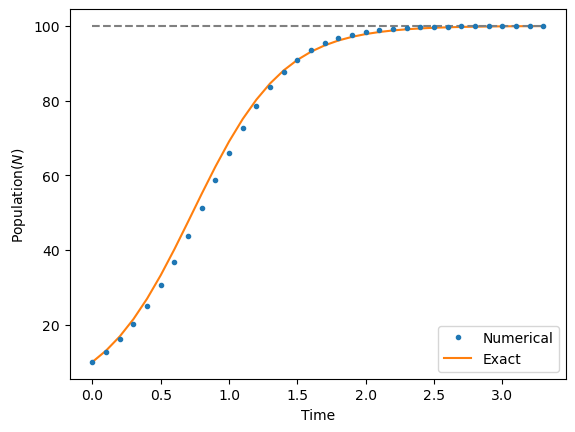

In [18]:
import numpy as np
from matplotlib import pyplot as plt

def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2                # Stop running if the change in population
                                        # between consecutive runs is less than this value
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    # Should we stop the loop?
    try:
        # The lists start empty so the following will raise an
        # error the first two rounds. I am using try to get around it.
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # I am being paranoid and checking if there is an error even
        # when the list has more than two elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

### 1.8 Some things to note about the code

Some programmatical features to note in the above code:

1. Dictionary was used to hold time and population data
2. Used a True condition with the while loop. So it will keep running until I break out on my own
3. To break out, check if the population has changed significantly
    - The threshold used is 0.01. To check this, do not compare two numbers. (**Never compare two floats!**). Instead, check if difference between two is as small as I want
    - Use np.abs() to not worry if difference is negative
4. Since I need to compare two numbers, need wait at least two rounds for condition to work. Use try-except to step around the fit that Python would otherwise throw

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

To show how to solve coupled differential equations, The Predator-Prey model is picked. It is a simple ecological model to describe the predator-prey interactions between foxes and rabbits.

The basic equations that describe this model are the Lotka-Volterra equations.

$\frac{dr}{dt} = αr−βrf$

$\frac{df}{dt} = δfr−γf$

r represent the rabbits (prey) and f foxes (predators). α, β, δ, γ are constants. For simulation, we will use the values below:

α = 2

β = 2 

δ = 3

γ = 3

### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

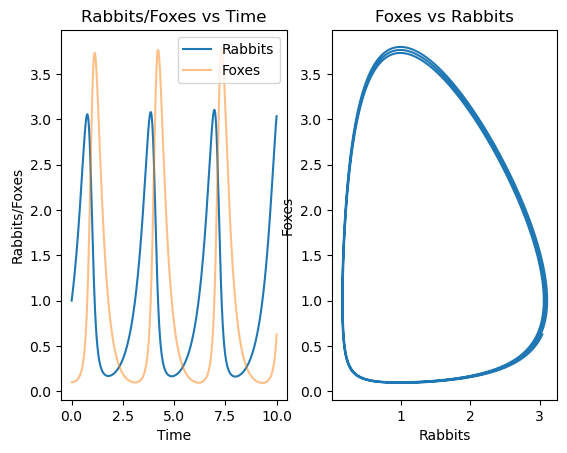

In [19]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')


Both predator and prey show a cyclical trend over time. Rabbit lowest when foxes peak because of all the feasting. Past this, foxes start going hungry, reducing their numbers and giving the rabbits a chance to make a comback. Plot on the right is called a 'phase plot' that shows the cyclical trend just stated.

### 2.3 Some things to note about the code

A few things to highlight:
1. Deriatives were encapsulated in functions. This allowed me to do to focus on what was happening in the loop
2. A new variable rabbit_new was used to hold the new value of rabbits temporarily. This is because the old value contained in rabbits is still needed to calculate the new value for foxes.
3. A list data was first used to collect the data and split them into dictionary later. May be unnecessary but more readable

## 3 Hello SciPy

Euler is seldom used for realwork because it has several drawbacks. People invariably use more accurate and efficient methods like Runge-Kutta

### 3.1 SciPy odeint()

In [20]:
#will use SciPy function odeint()
from scipy.integrate import odeint

Wroks by giving it the initial values and functions to calculate the various derivatives
If differential equation is of form:

$\frac{dy}{dx} = f(y,x)$

Need a Python function that returns f(y,x) to give odeint(). y intentionally written before x her because odeint() expects the dependent variable first and the independent variable after. odeint() allows us to pass other optional variables too. 

### 3.2 Radioactivity

Text(0.5, 0, 'Time(Millions of years)')

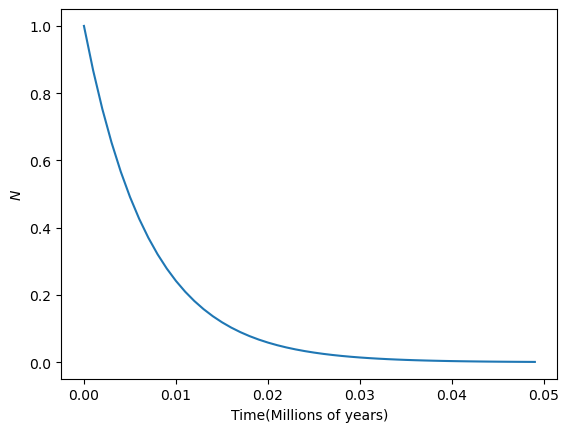

In [30]:
max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )

plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')

### 3.3 Logistic Equation

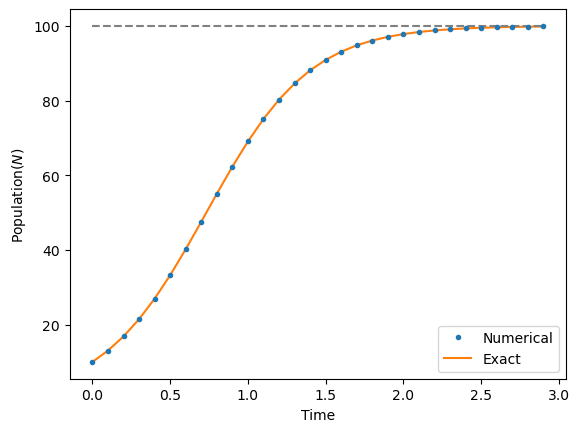

In [29]:
def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], data['N'],
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

### 3.4 Predator-Prey

Text(0.5, 1.0, 'Foxes vs Rabbits')

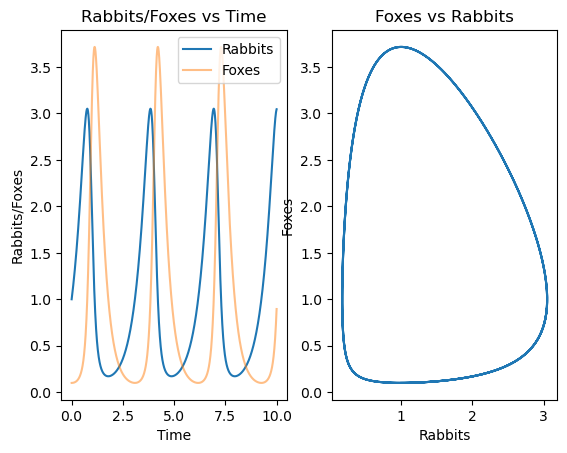

In [28]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]


fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

## Exercise 1 :  The Lorentz Attaractor

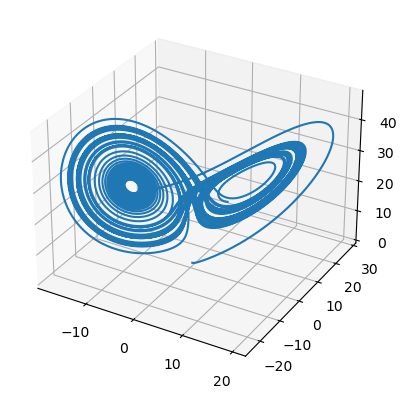

In [43]:
max_time = 50
dt = 0.001
x0 = 0
y0 = 1
z0 = 0


def dv_dt(v, t):
    x, y, z = v
    a, b, p = 10, 8/3, 28
    
    #dx
    dxdt = a*(y-x)
    
    #dy
    dydt = x*(p-z) - y

    #dz
    dzdt = x*y - b*z
    
    return [dxdt, dydt, dzdt]

data = {}
data['time'] = np.arange(0, max_time, dt)
results = odeint(y0=[x0, y0, z0], func=dv_dt, t=data['time'])
data['x'] = results[:, 0]
data['y'] = results[:, 1]
data['z'] = results [:, 2]

x = data['x']
y = data['y']
z = data['z']

plt.style.use('default')

ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
plt.show()

